<h1>Linear Regression</h1>

Notebook Goals

* Learn how to create a linear regression model using scikit-learn
* Learn the importance of handing missing values

<h2> Why linear regression?</h2> 

Before creating a more complex model than linear regression, it really helps to have knowledge of how the scikit-learn estimator API works. This will not only make more complex models will be easier to understand, but also show you some common mistakes like assuming your data doesn't have missing values.  

<h2> Import Libraries</h2>

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Dataset
Abalone is a mollusc with a peculiar ear-shaped shell lined of mother of pearl. Its age can be estimated counting the number of rings in their shell with a microscope.  

![](images/abalone.png)

The code below loads a modified version of the abalone dataset. This dataset can be used for regression if you predict number of rings or classification if you predict Sex (M, F, I). The only difference between this and the normal abalone dataset is that there is a missing value in this modified version. 

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/Abalone/abalone.csv')

In [45]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<h2>  Remove Missing or Impute Values </h2>
If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [46]:
# Look at the shape of the dataframe
df.shape

(4177, 9)

In [47]:
# There is a missing value in the Length column which is a feature
df.isnull().sum()

Sex               0
Length            1
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

You can either remove rows where there is a missing value or you can fill in missing values. The option used in this notebook is to remove rows with missing values. 

In [48]:
# Remove entire rows from dataframe if they contain any nans in them or 'all'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [49]:
# There are no more missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [50]:
df.shape

(4176, 9)

You could have filled in missing values using the `fillna` method on a pandas series if you want

<h2> Arrange Data into Features Matrix and Target Vector </h2>
Target is Rings

In [51]:
feature_names = ['Length']

In [52]:
# Multiple column features matrix to convert to NumPy Array
df.loc[:, feature_names]

,Length
0,0.455
1,0.350
2,0.530
3,0.440
4,0.330
...,...
4172,0.565
4173,0.590
4174,0.600
4175,0.625


In [53]:
# Convert to numpy array
X = df.loc[:, feature_names].values

In [54]:
# Make sure NumPy array is two dimensional
X.shape

(4176, 1)

In [55]:
# Pandas series to convert to NumPy Array
df.loc[:, 'Rings']

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4176, dtype: int64

In [56]:
y = df.loc[:, 'Rings'].values

In [57]:
y.shape

(4176,)

<h2> Linear Regression</h2>

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [58]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LinearRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where you can tune the hyperparameters of a model. In the case of linear regression, you can set `fit_intercept` to True or False depending on your needs. This is an important concept as more complex models have a lot more you can tune. The image below shows that sometimes tuning a single parameter can have a major difference

![images](images/regInterceptTrueFalse.png)

In [59]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

In [60]:
# If you want to see what you can tune for a model, you can use the help function
#help(LinearRegression)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x and y

In [61]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<b>Step 4:</b> Predict the values of new data. Uses the information the model learned during the model training process

Predict for One Observation

In [62]:
# Input needs to be two dimensional (reshape makes input two dimensional )
reg.predict(X[0].reshape(1,-1))

array([8.90017985])

Predict for Multiple Observations at Once

In [63]:
reg.predict(X[0:10])

array([ 8.90017985,  7.33091123, 10.02108602,  8.67599862,  7.03200292,
        8.45181739, 10.24526725,  9.19908816, 10.31999433,  9.94635894])

<h2> Measuring Model Performance</h2> 

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [68]:
# Pretty terrible model
score = reg.score(X, y)
print(score)

0.3106204548587953


## What is the equation of the line for the regression?

After you fit an instance of a model in scikit-learn, you can use additional attributes. 

In [69]:
reg.coef_

array([14.94541549])

In [70]:
reg.intercept_

2.100015807345639

In [71]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 14.95x + 2.10


## Plotting the Best Fit Linear Regression Line in Red

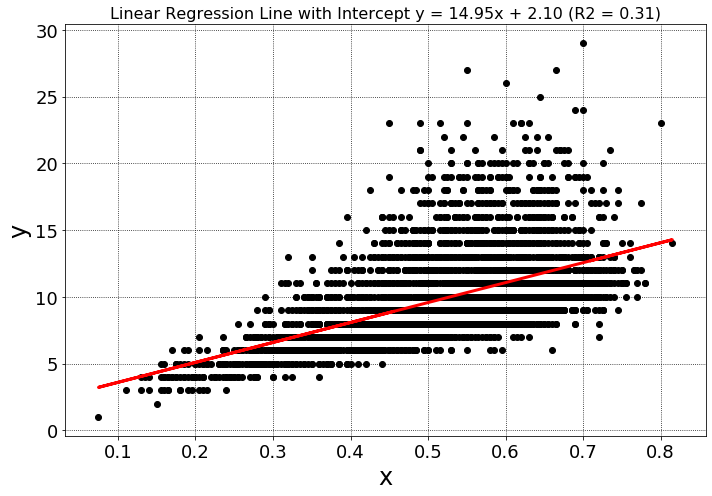

In [72]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('x', fontsize = 24)
ax.set_ylabel('y', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)

<h2> Plotting Models With or Without Intercept </h2>
In this section, you will see how changing a hyperparameter value can have a drastic impact on the R2 

In [73]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

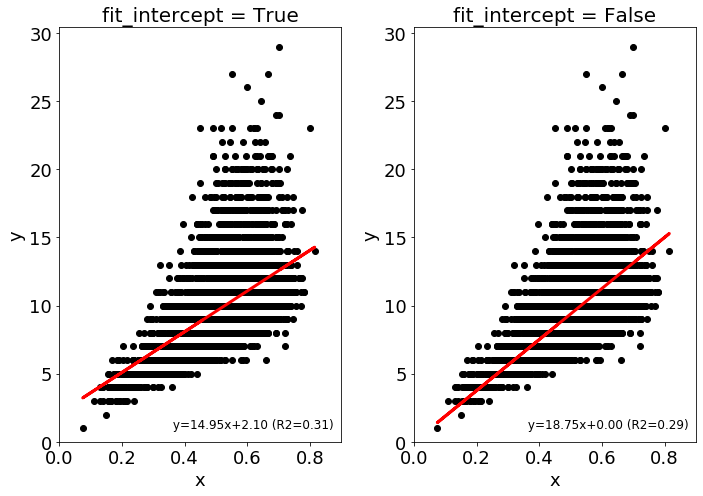

In [82]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('x', fontsize = 18)
    ax[index].set_ylabel('y', fontsize = 18)
    ax[index].set_xlim(left = 0, right = .9)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(.35, 1, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()

## Common questions

<h3>Would adding more features improve performance</h3>
There are cases where less is more, but not in this case. The performance has improved. 

In [84]:
feature_names = ['Length',
                 'Diameter',
                 'Height',
                 'Whole weight', 
                 'Shucked weight',
                 'Viscera weight',
                 'Shell weight']

# Convert to numpy array
X = df.loc[:, feature_names].values
y = df.loc[:, 'Rings'].values

# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)
print(score_inter)

0.5275601593159873


<h3> What is an instance of a model </h3>


![images](images/InstanceClass.png)
Dont know where this image was originally from

A Class is basically a blueprint for creating instances. Each unique dog we create using our dog class will be an instance of that class
Need a blueprint to create a new dog so we don’t have to do it manually from scratch everytime. 

A major benefit of using scikit-learn is that when models require user-specified parameters, the library defines an appropriate default value. You can look at the default values using the help function.

In [85]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin, sklearn.base.MultiOutputMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False`